# Alex AI/ML Training V1

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import decimate

In [2]:
# Reading 3D accelerometer/gyro values 
def convert_strings_to_floats_acc(input_array):
    X_out=[]
    Y_out=[]
    Z_out=[]
    for element in input_array:
        x,y,z = element.split(',')    
        X_out.append(float(x))
        Y_out.append(float(y))
        Z_out.append(float(z))
    return np.array(X_out), np.array(Y_out), np.array(Z_out)  

# Reading quaterion values
def convert_strings_to_floats_ori(input_array):
    q1_out =[] 
    q2_out =[] 
    q3_out =[] 
    q4_out =[] 
    for element in input_array:
        q1,q2,q3,q4 = element.split(',')    
        q1_out.append(float(q1))
        q2_out.append(float(q2))
        q3_out.append(float(q3))
        q4_out.append(float(q4))
    return np.array(q1_out), np.array(q2_out), np.array(q3_out), np.array(q4_out)  


In [3]:
#directory path
dir_path = "/home/alexbeat/data/kuopio-gait-dataset-processed-v2"

In [4]:
#sampling frequency
fs = 100

#exclude these ID's from the data set
excluded_IDs= ['11', '14', '37', '49']

#necessary headers for data  
imu_loc_names= ['pelvis_imu','tibia_r_imu','femur_r_imu','tibia_l_imu','femur_l_imu','calcn_r_imu','calcn_l_imu']
# Force plate 2 is where the measurement was collected
grf_channel_names = ['f2_1', 'f2_2', 'f2_3']

In [5]:
#get ID list
ID_list = os.listdir(dir_path)
print(ID_list)
#exclude unwanted ID's
ID_list = [ID for ID in ID_list if ID not in excluded_IDs]
print(ID_list)

['40', '32', '01', '14', '50', '45', '16', '46', '28', '29', '20', '34', '36', '42', '09', '48', '05', '31', '26', '27', '17', '10', '35', '07', '22', '24', '51', '06', '03', '15', '44', '02', '49', '11', '19', '25', '39', '04', '38', '47', '43', '18', '13', '23', '21', '37', '12', '08', '30', '41', '33']
['40', '32', '01', '50', '45', '16', '46', '28', '29', '20', '34', '36', '42', '09', '48', '05', '31', '26', '27', '17', '10', '35', '07', '22', '24', '51', '06', '03', '15', '44', '02', '19', '25', '39', '04', '38', '47', '43', '18', '13', '23', '21', '12', '08', '30', '41', '33']


In [6]:
#start loop for all ID's
for ID in ID_list:
    #extend the path
    dir_path_imu = os.path.join(dir_path, ID, "imu_extracted") 
    dir_path_grf = os.path.join(dir_path, ID, "mocap")
    
    #filter the filenames in imu directory:
    filenames = os.listdir(dir_path_imu)
    imu_files = [file for file in filenames if file.endswith(".sto")]
    
    #filter the filenames in mocap directory:
    filenames = os.listdir(dir_path_grf)

    substring1 = "calib"
    substring2 = "mass"

    grf_files = [file for file in filenames if file.endswith("grfs.sto")]
    grf_files = [file for file in grf_files if substring1 not in file and substring2 not in file]


In [7]:
dir_path_imu = os.path.join(dir_path, ID_list[0], "imu_extracted")    
f_name_imu = os.path.join(dir_path_imu,"data_l_comf_01_00B42D4D.txt")
f_name_acc = os.path.join(dir_path_imu,"data_l_comf_01_accelerations.sto")
f_name_ori = os.path.join(dir_path_imu,"data_l_comf_01_orientations.sto")

dir_path_grf = os.path.join(dir_path, ID_list[0], "mocap")    
f_name_grf = os.path.join(dir_path_grf,"l_comf_01_grfs.sto")

#filter the filenames in imu directory:
filenames = os.listdir(dir_path_imu)
imu_files = [file for file in filenames if file.endswith(".sto")]

#filter the filenames in mocap directory:
filenames = os.listdir(dir_path_grf)

substring1 = "calib"
substring2 = "mass"

grf_files = [file for file in filenames if file.endswith("grfs.sto")]
grf_files = [file for file in grf_files if substring1 not in file and substring2 not in file]

# acc_channel_names= ['Acc_X','Acc_Y','Acc_Z']
# acc_x = df_imu[acc_channel_names[0]].values
# acc_y = df_imu[acc_channel_names[1]].values
# acc_z = df_imu[acc_channel_names[2]].values

df_acc = pd.read_csv(f_name_acc,skiprows=[1,2,3,4],header=1,delimiter='\t')
df_ori = pd.read_csv(f_name_ori,skiprows=[1,2,3,4],header=1,delimiter='\t')
df_grf = pd.read_csv(f_name_grf,skiprows=[1,2,3,4],header=1,delimiter='\t')


print(df_acc.head())

   time                                         pelvis_imu  \
0  0.00  8.960133490286751,0.163919578630772,4.12588502...   
1  0.01  8.950378181107141,0.185263897599616,4.13653509...   
2  0.02  8.972062936991851,0.181173212098551,4.11040621...   
3  0.03  8.97187610535121,0.183118425836582,4.110727828...   
4  0.04  8.952271129167411,0.224975945514825,4.13219647...   

                                         tibia_r_imu  \
0  9.485688679659139,0.139810580452971,-2.4596105...   
1  9.529911138924019,0.169861270586764,-2.4851128...   
2  9.45599930405827,0.184952364735593,-2.43267294...   
3  9.53296397176441,0.179418411613754,-2.42327401...   
4  9.55695012458234,0.26019642116024,-2.446919610...   

                                         femur_r_imu  \
0  9.6860702439058,-0.150285874883136,-1.54008804...   
1  9.662362869080351,-0.108609951833301,-1.617791...   
2  9.671360532873649,-0.139253067100873,-1.629063...   
3  9.629635482266471,-0.158913776008708,-1.657409...   
4  9.69130

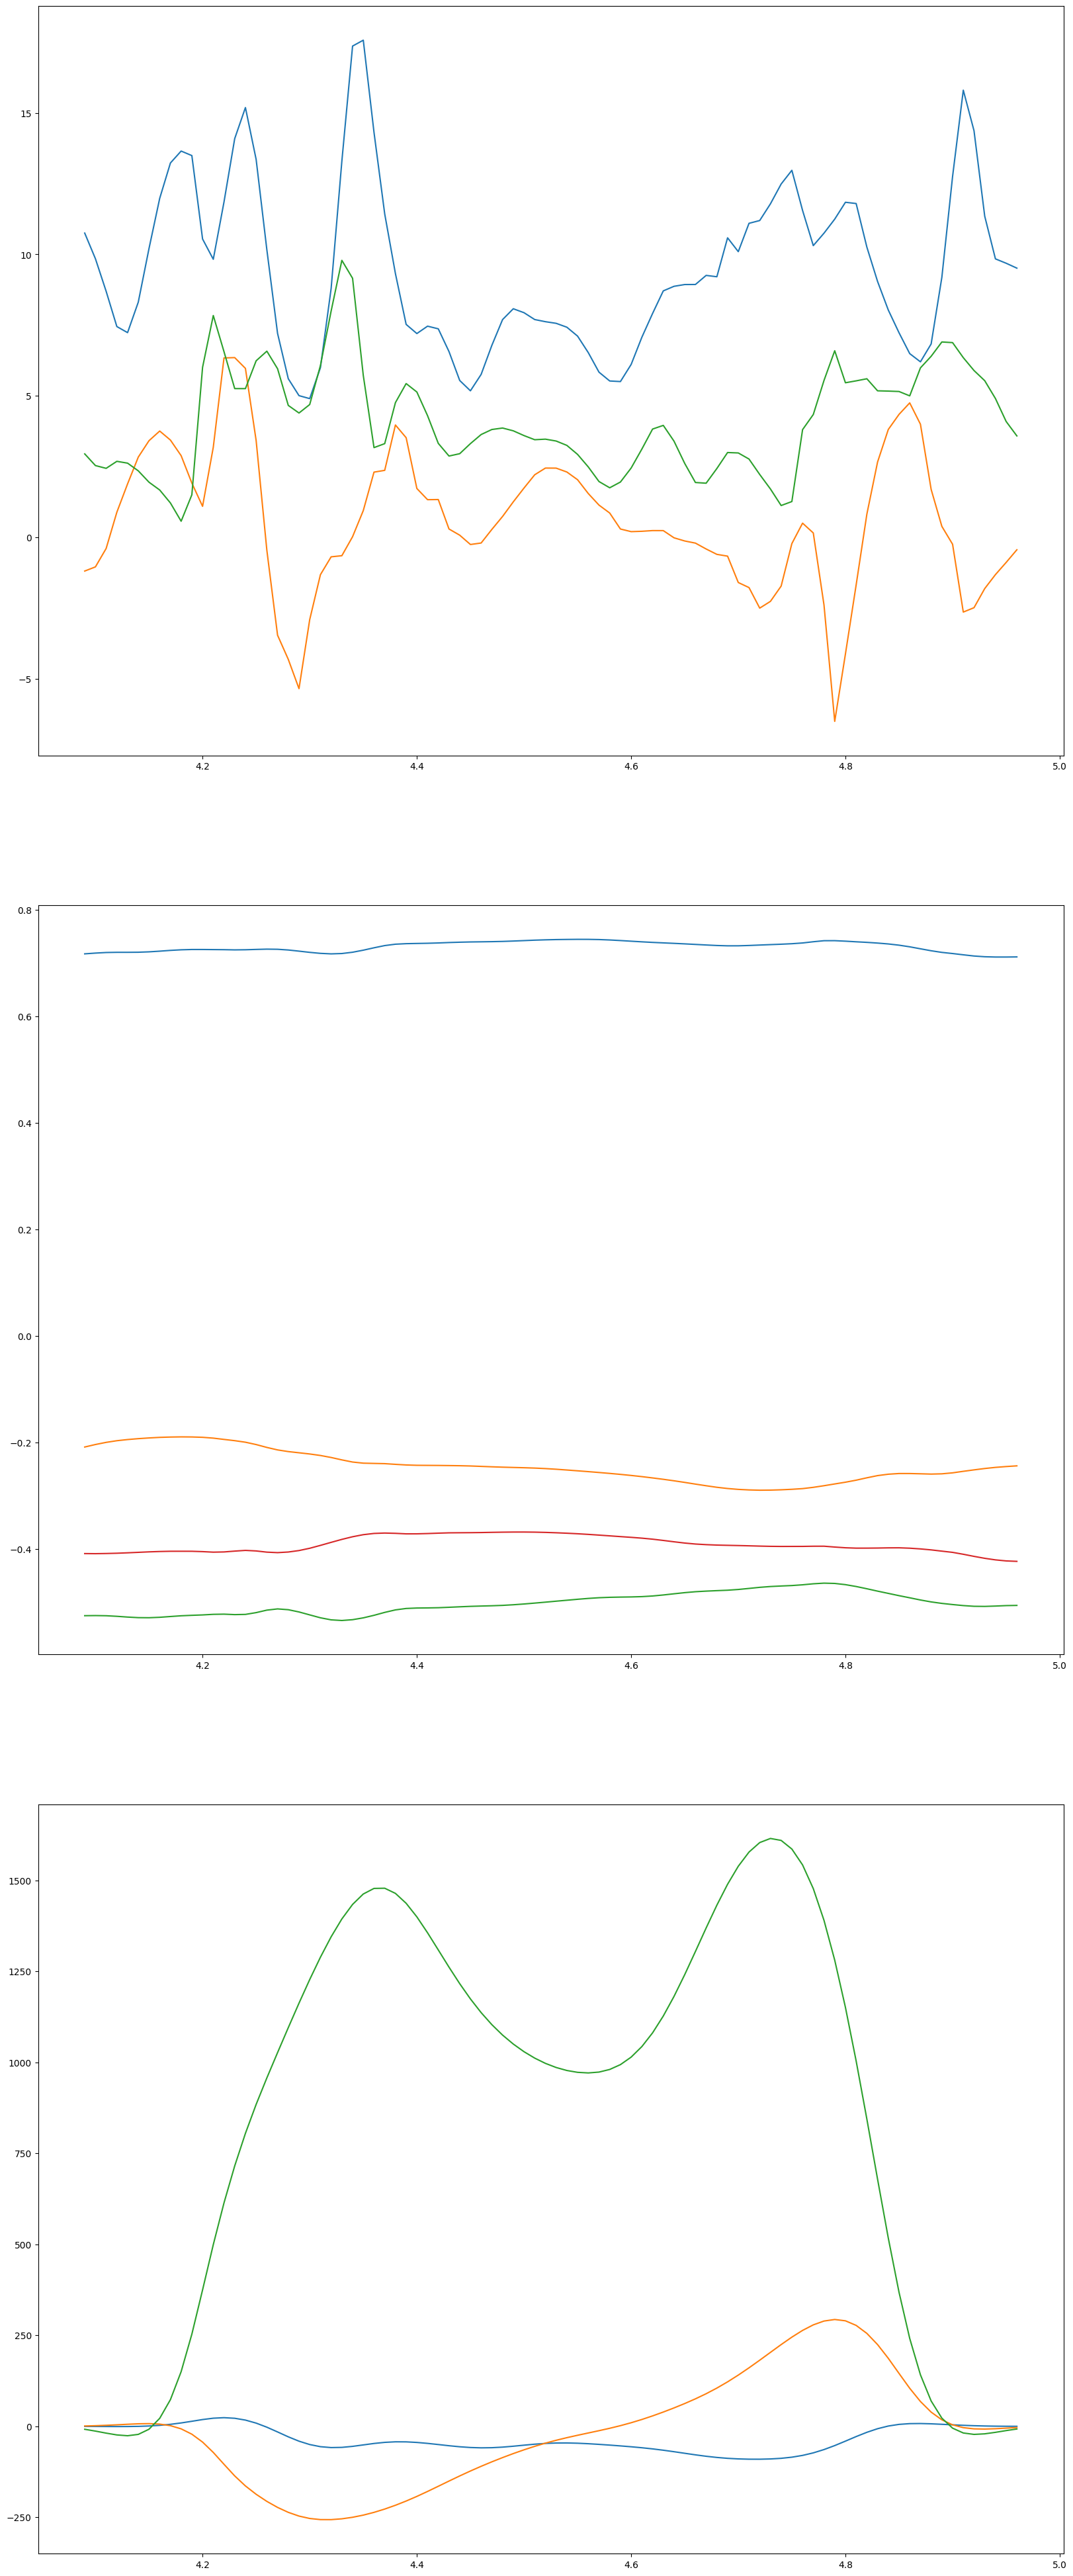

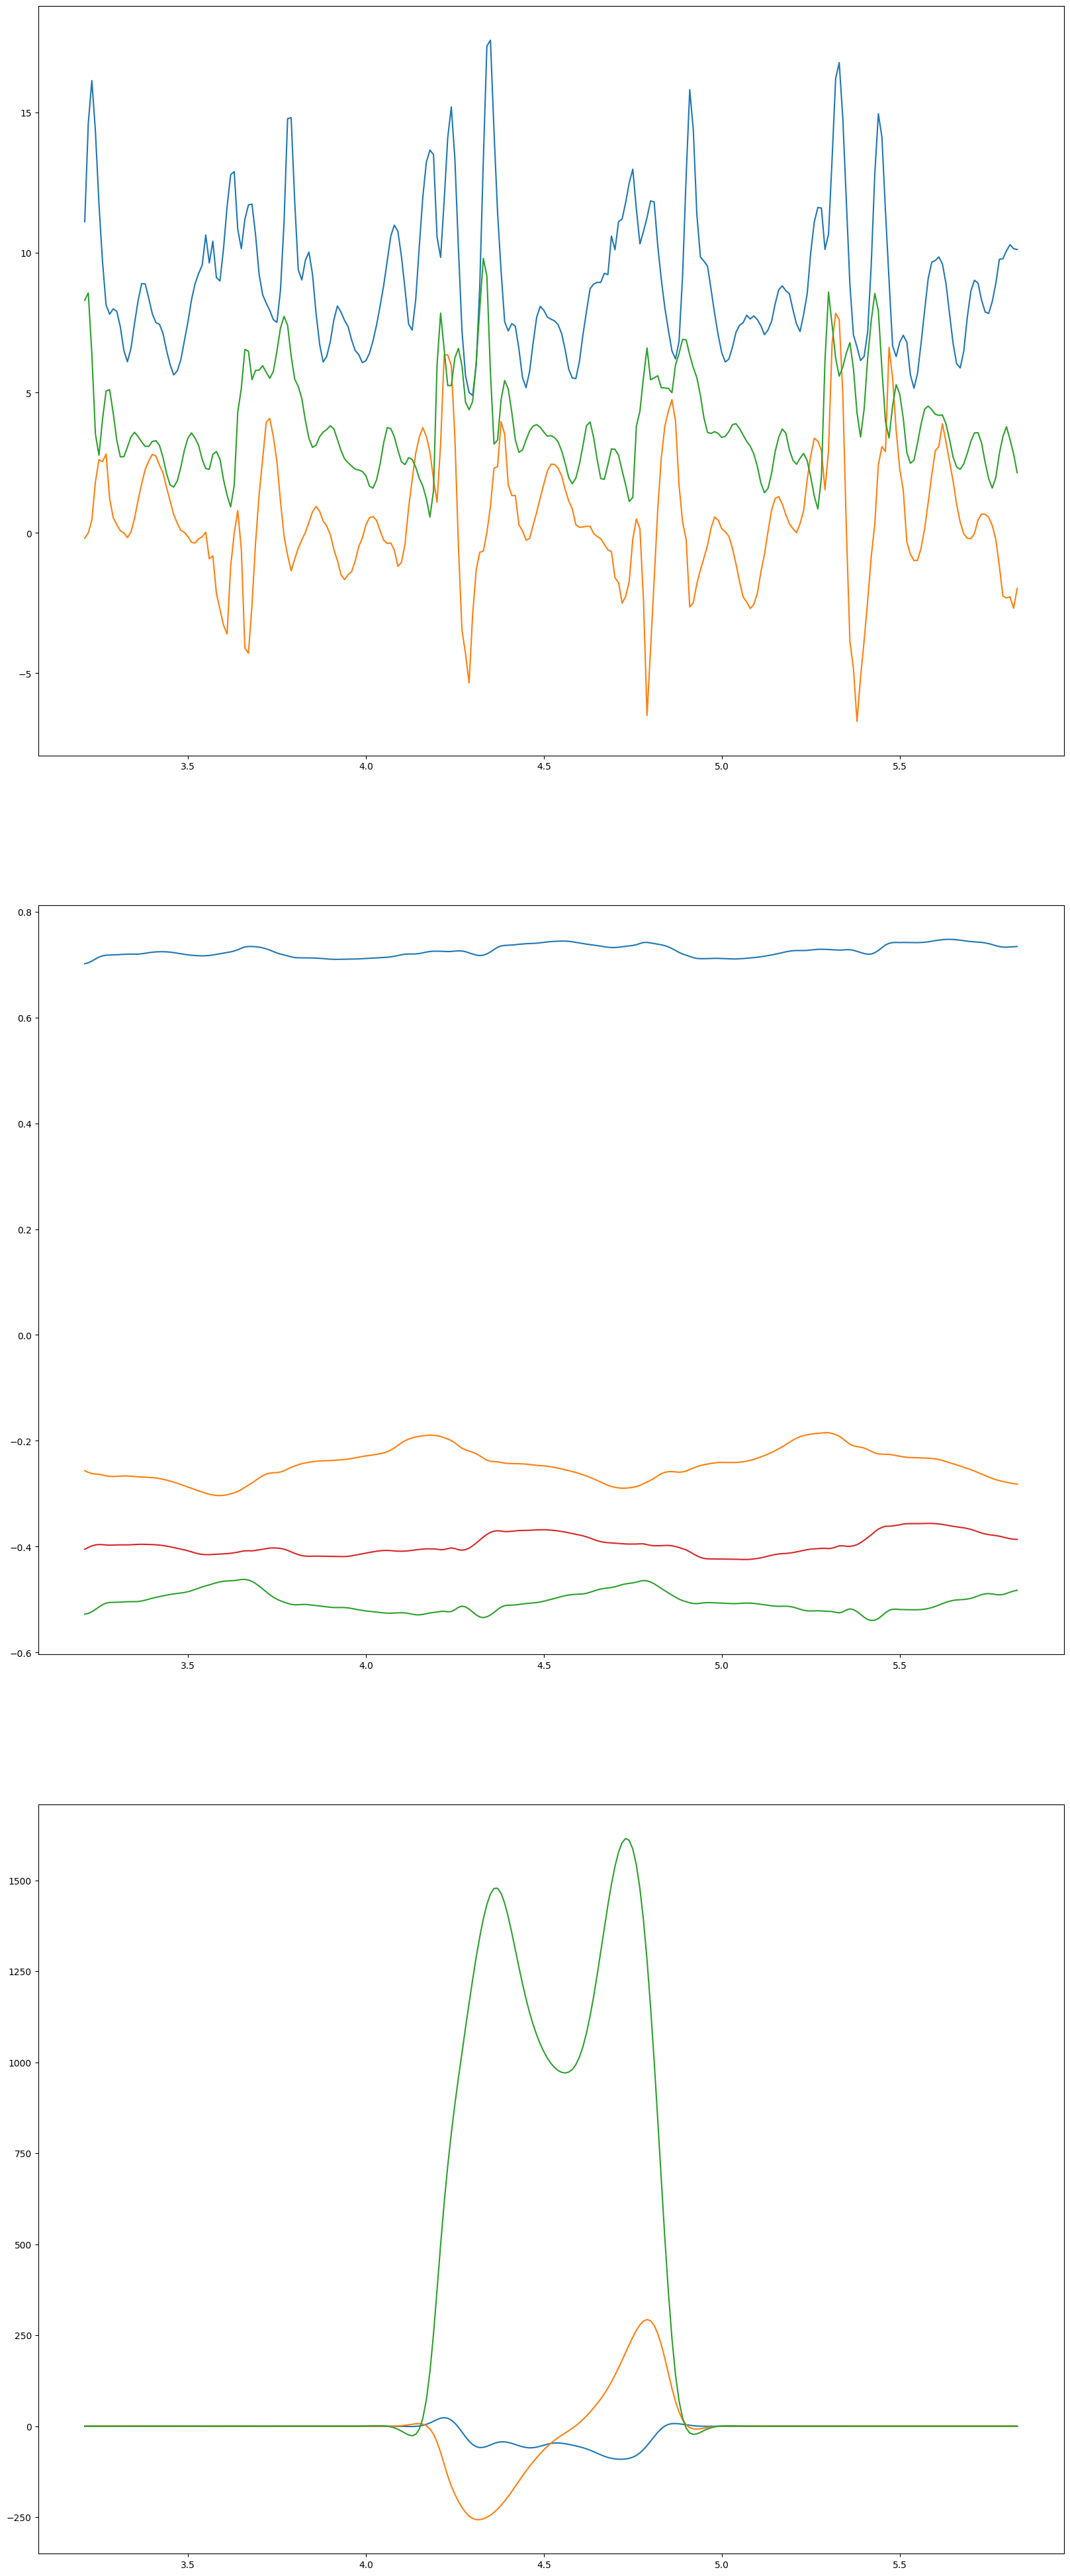

In [8]:
#extract channels
accel_pelvis = df_acc['pelvis_imu'].values
ori_pelvis = df_ori['pelvis_imu'].values
grf_x = df_grf['f2_1']
grf_y = df_grf['f2_2']
grf_z = df_grf['f2_3']

#downsampling factor
decim_factor = int(1000/fs)

grf_x = decimate(grf_x,decim_factor)
grf_y = decimate(grf_y,decim_factor)
grf_z = decimate(grf_z,decim_factor) 

#time vectors
time = np.linspace(0, (len(df_acc)-1)/fs, len(df_acc))
time_grf = np.linspace(0, (len(grf_z)-1)/fs, len(grf_z))

#extract quaternion and accel data from a string
accel_pelvis_x,accel_pelvis_y,accel_pelvis_z= convert_strings_to_floats_acc(accel_pelvis)
ori_pelvis_q1,ori_pelvis_q2,ori_pelvis_q3,ori_pelvis_q4 = convert_strings_to_floats_ori(ori_pelvis)

#use the prominent component of force to determine activation of the force plate
index_z = np.where(np.abs(grf_z)>5)

#extended window length
indices= index_z[0]
window = np.arange(indices[0]-len(grf_z[index_z]),indices[len(indices)-1]+len(grf_z[index_z]),1)

# this plot is for the segment where force plate is struck.
fig,ax = plt.subplots(3,figsize=(20,50))
ax[0].plot(time[index_z],accel_pelvis_x[index_z])
ax[0].plot(time[index_z],accel_pelvis_y[index_z])
ax[0].plot(time[index_z],accel_pelvis_z[index_z])

ax[1].plot(time[index_z],ori_pelvis_q1[index_z])
ax[1].plot(time[index_z],ori_pelvis_q2[index_z])
ax[1].plot(time[index_z],ori_pelvis_q3[index_z])
ax[1].plot(time[index_z],ori_pelvis_q4[index_z])

ax[2].plot(time_grf[index_z],grf_x[index_z])
ax[2].plot(time_grf[index_z],grf_y[index_z])
ax[2].plot(time_grf[index_z],grf_z[index_z])

#this plot has wider time window, 3 times the segment lenght
fig,ax = plt.subplots(3,figsize=(20,50))
ax[0].plot(time[window],accel_pelvis_x[window])
ax[0].plot(time[window],accel_pelvis_y[window])
ax[0].plot(time[window],accel_pelvis_z[window])

ax[1].plot(time[window],ori_pelvis_q1[window])
ax[1].plot(time[window],ori_pelvis_q2[window])
ax[1].plot(time[window],ori_pelvis_q3[window])
ax[1].plot(time[window],ori_pelvis_q4[window])

ax[2].plot(time_grf[window],grf_x[window])
ax[2].plot(time_grf[window],grf_y[window])
ax[2].plot(time_grf[window],grf_z[window])

plt.show()

#for saving the results
#plt.savefig(dir_path + 'gyr_ori_grf_decimated_window_extended.pdf',format = 'pdf', bbox_inches = 'tight')


In [9]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2024-12-01 16:20:40.385704: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-01 16:20:40.392595: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733062840.399904 1537864 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733062840.402048 1537864 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-01 16:20:40.410380: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11504843685663101012
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1120206848
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14196383524521405148
physical_device_desc: "device: 0, name: NVIDIA RTX 500 Ada Generation Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


I0000 00:00:1733062841.424466 1537864 gpu_device.cc:2022] Created device /device:GPU:0 with 1068 MB memory:  -> device: 0, name: NVIDIA RTX 500 Ada Generation Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [15]:
# Example: Generating random data for demonstration
print(df_acc.columns)
print(df_ori.columns)


# Print original DataFrame
print("Original DataFrame:")
print(df_ori.head())
df_ori_without_time = df_ori[[col for col in df_ori.columns if col != 'time']]

# Split the 'Quaternion' column into separate components
quaternion_split = df_ori.str.split(',', expand=True)

# Rename the new columns
quaternion_split.columns = ['q0', 'q1', 'q2', 'q3']

# Concatenate the original DataFrame with the new quaternion columns
df_updated = pd.concat([df.drop(columns=['Quaternion']), quaternion_split], axis=1)

# Print updated DataFrame
print("\nUpdated DataFrame:")
print(df_updated)
# accel_pelvis = df_acc['pelvis_imu'].values
# ori_pelvis = df_ori['pelvis_imu'].values
# grf_x = df_grf['f2_1']
# grf_y = df_grf['f2_2']
# grf_z = df_grf['f2_3']
# X = np.random.rand(num_samples, 49)  # 49 input features
# y = np.random.rand(num_samples, 3)    # 3 output features (x, y, z)

Index(['time', 'pelvis_imu', 'tibia_r_imu', 'femur_r_imu', 'tibia_l_imu',
       'femur_l_imu', 'calcn_r_imu', 'calcn_l_imu'],
      dtype='object')
Index(['time', 'pelvis_imu', 'tibia_r_imu', 'femur_r_imu', 'tibia_l_imu',
       'femur_l_imu', 'calcn_r_imu', 'calcn_l_imu'],
      dtype='object')


In [28]:
# Concatenate the Orientations
# Print original DataFrame
print("Original DataFrame:")
print(df_ori.head())

# Initialize an empty list to hold the new columns
new_columns = []

# Loop through each column (except 'time') to split and rename
for col in df_ori.columns[1:]:  # Skip the 'time' column
    # Split the quaternion string into separate components
    quaternion_split = df_ori[col].str.split(',', expand=True)
    
    # Rename the new columns based on the original column name
    quaternion_split.columns = [f"{col}_q{i}" for i in range(4)]  # q0, q1, q2, q3
    
    # Append the new columns to the list
    new_columns.append(quaternion_split)

# Concatenate all new columns into a single DataFrame
new_columns_df = pd.concat(new_columns, axis=1)
# print(new_columns)
print("Quaternion split df: ")
print(new_columns_df.head())

# Concatenate the 'time' column with the new columns
result_ori_df = pd.concat([df_ori[['time']], new_columns_df], axis=1)
# Print the updated DataFrame
print("\nUpdated DataFrame with separate quaternion components:")
print(result_ori_df)
print(result_ori_df.shape)

Original DataFrame:
   time                                         pelvis_imu  \
0  0.00  0.7179812934705582,-0.2699897565529509,-0.4688...   
1  0.01  0.7179570698090412,-0.2699334345002075,-0.4689...   
2  0.02  0.7179285680684022,-0.2698736300735068,-0.4689...   
3  0.03  0.7179075663250898,-0.2697868002982207,-0.4689...   
4  0.04  0.7178890417711085,-0.269700610742829,-0.46896...   

                                         tibia_r_imu  \
0  0.6117393573839961,-0.0159806512802741,-0.7905...   
1  0.6118064696814594,-0.01604113573575039,-0.790...   
2  0.6118666610140573,-0.01604851650273336,-0.790...   
3  0.6119184062916563,-0.01616660629174139,-0.790...   
4  0.6119726510550736,-0.01618235888360313,-0.790...   

                                         femur_r_imu  \
0  0.6241281250180574,0.1950328452246009,-0.73624...   
1  0.6241521029619359,0.1949870203402473,-0.73625...   
2  0.6241845849371513,0.1949384828541128,-0.73626...   
3  0.624224793291616,0.1948673124842888,-0.736

In [29]:
# Concatenate the Accelerations
# Print original DataFrame
print("Original DataFrame:")
print(df_acc.head())

# Initialize an empty list to hold the new columns
new_columns = []

# Loop through each column (except 'time') to split and rename
for col in df_acc.columns[1:]:  # Skip the 'time' column
    # Split the quaternion string into separate components
    acc_split = df_acc[col].str.split(',', expand=True)
    
    # Rename the new columns based on the original column name
    acc_split.columns = [f"{col}_acc{i}" for i in range(3)]  # q0, q1, q2, q3
    
    # Append the new columns to the list
    new_columns.append(acc_split)

# Concatenate all new columns into a single DataFrame
new_columns_df = pd.concat(new_columns, axis=1)
# print(new_columns)
print("Acc split df: ")
print(new_columns_df.head())

# Concatenate the 'time' column with the new columns
result_acc_df = pd.concat([df_acc[['time']], new_columns_df], axis=1)
# Print the updated DataFrame
print("\nUpdated DataFrame with separate quaternion components:")
print(result_acc_df)
print(result_acc_df.shape)

Original DataFrame:
   time                                         pelvis_imu  \
0  0.00  8.960133490286751,0.163919578630772,4.12588502...   
1  0.01  8.950378181107141,0.185263897599616,4.13653509...   
2  0.02  8.972062936991851,0.181173212098551,4.11040621...   
3  0.03  8.97187610535121,0.183118425836582,4.110727828...   
4  0.04  8.952271129167411,0.224975945514825,4.13219647...   

                                         tibia_r_imu  \
0  9.485688679659139,0.139810580452971,-2.4596105...   
1  9.529911138924019,0.169861270586764,-2.4851128...   
2  9.45599930405827,0.184952364735593,-2.43267294...   
3  9.53296397176441,0.179418411613754,-2.42327401...   
4  9.55695012458234,0.26019642116024,-2.446919610...   

                                         femur_r_imu  \
0  9.6860702439058,-0.150285874883136,-1.54008804...   
1  9.662362869080351,-0.108609951833301,-1.617791...   
2  9.671360532873649,-0.139253067100873,-1.629063...   
3  9.629635482266471,-0.158913776008708,-1.657

In [34]:
# Merging the two DataFrames on the 'time' column
merged_input_df = pd.merge(result_ori_df, result_acc_df, on='time')
merged_input_df = merged_input_df.drop('time', axis=1)
print(merged_input_df.head())
print(merged_input_df.shape)

        pelvis_imu_q0        pelvis_imu_q1        pelvis_imu_q2  \
0  0.7179812934705582  -0.2699897565529509  -0.4688760797841802   
1  0.7179570698090412  -0.2699334345002075  -0.4689072416849787   
2  0.7179285680684022  -0.2698736300735068  -0.4689365069616344   
3  0.7179075663250898  -0.2697868002982207  -0.4689561876248568   
4  0.7178890417711085   -0.269700610742829  -0.4689658317636351   

         pelvis_imu_q3      tibia_r_imu_q0        tibia_r_imu_q1  \
0  -0.4379082271310296  0.6117393573839961   -0.0159806512802741   
1  -0.4379492956330936  0.6118064696814594  -0.01604113573575039   
2  -0.4380015381032612  0.6118666610140573  -0.01604851650273336   
3  -0.4380683767249071  0.6119184062916563  -0.01616660629174139   
4  -0.4381414759049257  0.6119726510550736  -0.01618235888360313   

        tibia_r_imu_q2        tibia_r_imu_q3      femur_r_imu_q0  \
0  -0.7905175613385185  -0.02452677368664095  0.6241281250180574   
1  -0.7904648435252132  -0.02451237995130325  0.6241

In [57]:
# Concatenate the Forces
# Print original DataFrame
print("Original DataFrame:")
force_num = 2
forces_df = df_grf[[f"f{force_num}_1",f"f{force_num}_2",f"f{force_num}_3"]]

grf_x = df_grf['f2_1']
grf_y = df_grf['f2_2']
grf_z = df_grf['f2_3']

#downsampling factor
decim_factor = int(1000/fs)

grf_x = decimate(grf_x,decim_factor)
grf_y = decimate(grf_y,decim_factor)
grf_z = decimate(grf_z,decim_factor) 

#time vectors
time = np.linspace(0, (len(df_acc)-1)/fs, len(df_acc))
time_grf = np.linspace(0, (len(grf_z)-1)/fs, len(grf_z))
print(forces_df.head())

#downsampling factor
decim_factor = int(1000/fs)
decimate_columns = forces_df.apply(lambda x: decimate(x,decim_factor))

print(decimate_columns.head())
print(decimate_columns.shape)

# Concatenate the 'time' column with the new columns
# result_grf_df = pd.concat([df_grf[['time']],decimate_columns], axis=1)

# Print the updated DataFrame
print("\nUpdated DataFrame with separate force components:")
print(result_grf_df)
print(result_grf_df.shape)

Original DataFrame:
   f2_1  f2_2  f2_3
0  -0.0   0.0   0.0
1  -0.0   0.0   0.0
2  -0.0   0.0   0.0
3  -0.0   0.0   0.0
4  -0.0   0.0   0.0
           f2_1          f2_2          f2_3
0  7.872820e-38 -1.870858e-36  4.949481e-36
1 -1.296981e-37  2.003195e-36 -2.503523e-35
2  1.580764e-37 -1.500715e-36  4.523348e-35
3 -1.441893e-37  2.600236e-37 -5.860996e-35
4  7.438781e-38  1.612178e-36  5.756191e-35
(815, 3)

Updated DataFrame with separate force components:
             f2_1          f2_2          f2_3
0    7.872820e-38 -1.870858e-36  4.949481e-36
1   -1.296981e-37  2.003195e-36 -2.503523e-35
2    1.580764e-37 -1.500715e-36  4.523348e-35
3   -1.441893e-37  2.600236e-37 -5.860996e-35
4    7.438781e-38  1.612178e-36  5.756191e-35
..            ...           ...           ...
810  4.408969e-30  1.020916e-29  1.911826e-29
811  6.307175e-30 -8.447781e-30  1.920582e-29
812 -1.197166e-29  4.366793e-30 -4.057643e-29
813  1.149755e-29  4.409543e-31  4.060677e-29
814 -4.469640e-30 -4.703121e-3

In [61]:
# merged_output_df = merged_output_df.drop('time', axis=1)
merged_output_df = result_grf_df
print(merged_output_df.head())
print(merged_output_df.shape)

           f2_1          f2_2          f2_3
0  7.872820e-38 -1.870858e-36  4.949481e-36
1 -1.296981e-37  2.003195e-36 -2.503523e-35
2  1.580764e-37 -1.500715e-36  4.523348e-35
3 -1.441893e-37  2.600236e-37 -5.860996e-35
4  7.438781e-38  1.612178e-36  5.756191e-35
(815, 3)


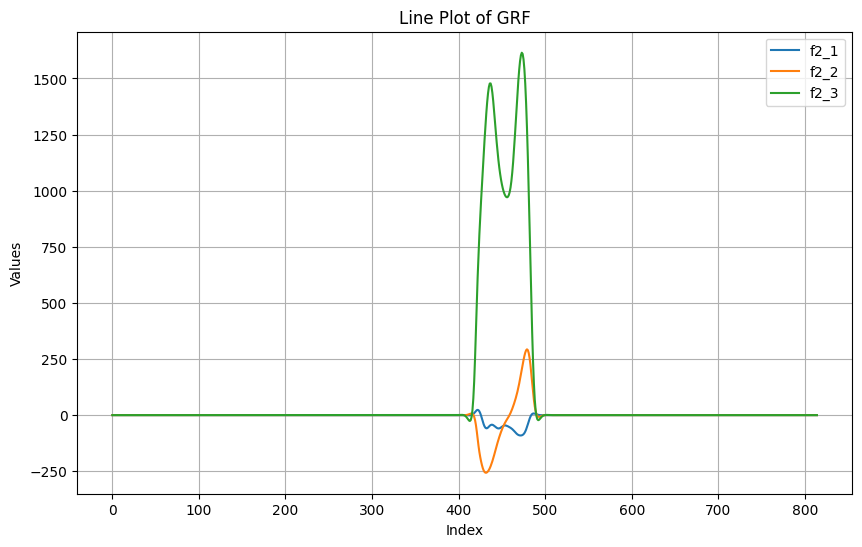

In [62]:
# Plotting the DataFrame
plt.figure(figsize=(10, 6))

for column in merged_output_df.columns:
    plt.plot(merged_output_df[column], label=column)

# Adding titles and labels
plt.title('Line Plot of GRF')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid()
# plt.yscale('log')  # Optional: Use logarithmic scale for better visibility of small values
plt.show()

In [76]:
x = merged_input_df  # 49 input features
y = merged_output_df    # 3 output features (x, y, z)
y = y.iloc[1:-1] # trim off first and last value

In [84]:
scalerX = StandardScaler()
X = scalerX.fit_transform(x)

scalerY = StandardScaler()
Y = scalerY.fit_transform(y)
print(f"X shape: {X.shape}")
print(f"Y shape: {y.shape}")

X shape: (813, 49)
Y shape: (813, 3)


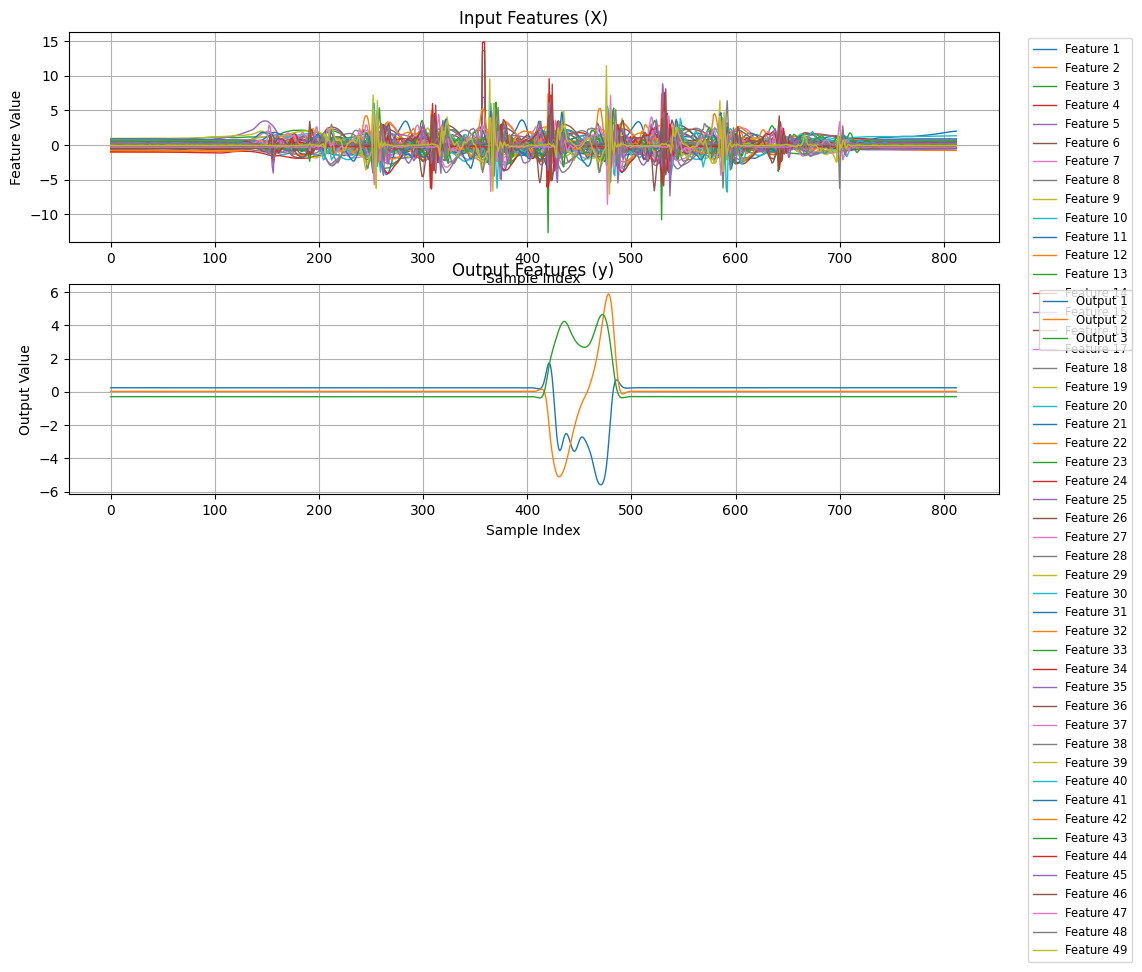

In [79]:
# Create a figure
plt.figure(figsize=(12, 6))

# Plotting the input features (X)
plt.subplot(2, 1, 1)
for i in range(X.shape[1]):  # Loop through each feature (column)
    plt.plot(X[:, i], label=f'Feature {i+1}', linewidth=1)
plt.title('Input Features (X)')
plt.xlabel('Sample Index')
plt.ylabel('Feature Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='small')
plt.grid()

# Plotting the output features (y)
plt.subplot(2, 1, 2)
for i in range(Y.shape[1]):  # Loop through each output feature (column)
    plt.plot(Y[:, i], label=f'Output {i+1}', linewidth=1)
plt.title('Output Features (y)')
plt.xlabel('Sample Index')
plt.ylabel('Output Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='small')
plt.grid()

plt.show()

In [80]:
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, activation='relu', input_shape=(49,)))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(3, activation='linear'))  # Linear activation for regression

/home/alexbeat/AlexDev/ai-imu-grf/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733066024.020189 1537864 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1068 MB memory:  -> device: 0, name: NVIDIA RTX 500 Ada Generation Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [81]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [82]:
model.fit(X, Y, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


I0000 00:00:1733066040.526079 1543254 service.cc:148] XLA service 0x7769300054d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733066040.526111 1543254 service.cc:156]   StreamExecutor device (0): NVIDIA RTX 500 Ada Generation Laptop GPU, Compute Capability 8.9
2024-12-01 17:14:00.537845: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733066040.591770 1543254 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/21 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - loss: 46227.3438 - mae: 56.4776

I0000 00:00:1733066041.194985 1543254 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 49483.9531 - mae: 48.5282 - val_loss: 0.7462 - val_mae: 0.5909
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 49192.0391 - mae: 48.4268 - val_loss: 3.3892 - val_mae: 1.1529
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 49544.5391 - mae: 48.2004 - val_loss: 14.4937 - val_mae: 2.2906
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55489.6133 - mae: 54.9575 - val_loss: 50.9495 - val_mae: 4.2417
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40578.4023 - mae: 44.7463 - val_loss: 149.4698 - val_mae: 6.9897
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46085.4688 - mae: 56.1000 - val_loss: 381.4849 - val_mae: 10.4961
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42556.0352 - mae: 54.5054 - val_loss: 819.6309 - val_mae: 14.1144
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38249.3125 - mae: 56.1431 - val_loss: 1568.9382 - val_mae: 18.1956
Epoch 9/100
21/21 ━━━

In [85]:
# Example: Generating random test data
X_test = np.random.rand(200, 49)
y_test = np.random.rand(200, 3)

# Normalize test data
X_test = scalerX.transform(X_test)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 55046.3008 - mae: 108.6958

/home/alexbeat/AlexDev/ai-imu-grf/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 80372.0156 - mae: 116.5617
Test Loss: 81653.96875, Test MAE: 118.99302673339844


In [86]:
predictions = model.predict(X_test)
print(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[ 3.34150581e+01  3.59641876e+01 -3.30961243e+02]
 [-4.74523468e+01 -9.84531403e+01  1.24609070e+03]
 [ 1.94873257e+01  3.93422546e+01 -1.03304123e+02]
 [ 1.16537895e+01  2.50579948e+01 -1.56760376e+02]
 [ 2.57699585e+01  3.52511139e+01 -2.44444717e+02]
 [ 1.04261484e+01  1.55962353e+01  9.59477844e+01]
 [ 4.24001026e+00  1.45461340e+01  9.69999847e+01]
 [ 3.14501762e+01  2.87542496e+01 -3.02920227e+02]
 [ 1.76465492e+01  2.65137043e+01 -1.74582016e+02]
 [ 4.10297356e+01  2.77615547e+01 -5.63752563e+02]
 [ 2.45638084e+01  1.51072350e+01 -4.16140320e+02]
 [-4.31926394e+00 -8.84602280e+01  4.68040924e+02]
 [ 2.42343292e+01  3.28205452e+01 -1.28559265e+02]
 [ 1.20388203e+01  2.49580040e+01 -6.30485249e+00]
 [ 1.25788994e+01  3.21863747e+00  3.75027351e+01]
 [ 9.73964500e+00  2.67087193e+01 -5.48626423e+00]
 [ 1.13412132e+01  1.19537048e+01 -2.53194904e+00]
 [ 3.47287254e+01  3.71679535e+01 -3.97720337e+02]
 [ 9.18609524e+00  2.88024750e+01  3.9542316

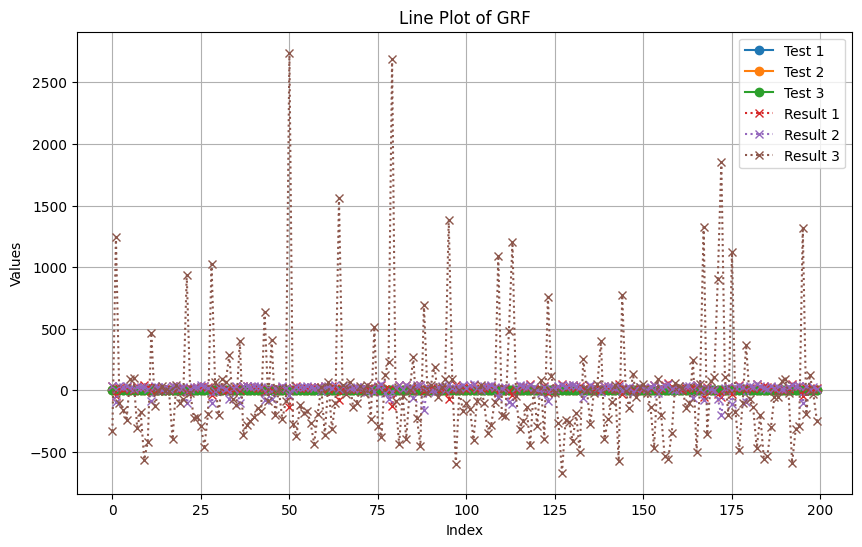

In [95]:
# Plotting the DataFrame
plt.figure(figsize=(10, 6))

for i in range(y_test.shape[1]):  # Loop over the number of columns
    plt.plot(y_test[:, i], label=f'Test {i+1}', marker='o')  # Use marker for visibility

# Plot each column as a separate line
for i in range(predictions.shape[1]):  # Loop over the number of columns
    plt.plot(predictions[:, i], label=f'Result {i+1}', marker='x', linestyle=':')  # Use marker for visibility

# Adding titles and labels
plt.title('Line Plot of GRF')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid()
# plt.yscale('log')  # Optional: Use logarithmic scale for better visibility of small values
plt.show()

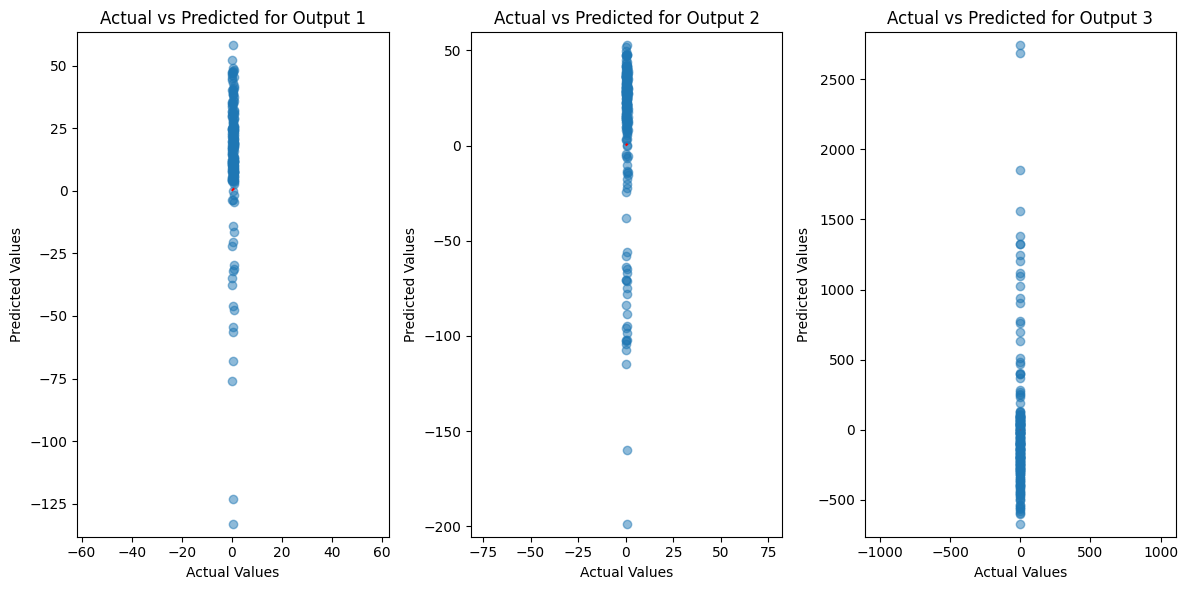

In [96]:
# Create a figure
plt.figure(figsize=(12, 6))
actual_values = y_test
predicted_values = predictions

# Plot actual vs predicted for each output (x, y, z)
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(actual_values[:, i], predicted_values[:, i], alpha=0.5)
    plt.plot([actual_values[:, i].min(), actual_values[:, i].max()],
             [actual_values[:, i].min(), actual_values[:, i].max()], 'r--')  # Diagonal line
    plt.title(f'Actual vs Predicted for Output {i+1}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.axis('equal')

plt.tight_layout()
plt.show()